In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Youth_Tobacco_Survey__YTS__Data.csv')
df.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [3]:
df.shape

(10600, 31)

In [4]:
df.dtypes

,0
YEAR,int64
LocationAbbr,object
LocationDesc,object
TopicType,object
TopicDesc,object
MeasureDesc,object
DataSource,object
Response,object
Data_Value_Unit,object
Data_Value_Type,object


In [5]:
# Calculate the number of missing values per column and sort them in descending order
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values


,0
Data_Value_Footnote,10083
Data_Value_Footnote_Symbol,10083
Response,2410
High_Confidence_Limit,520
Data_Value,520
Sample_Size,520
Data_Value_Std_Err,520
Low_Confidence_Limit,517
GeoLocation,4
TopicTypeId,0


In [6]:
# Menghitung rata-rata tingkat merokok berdasarkan jenis kelamin (pria dan wanita) setiap tahun dari data survei
male_smoking_rates = (
    df[df['Gender'].str.lower() == 'male']
    .groupby('YEAR')['Data_Value']
    .mean()
)

# Calculate average smoking rates for females by year
female_smoking_rates = (
    df[df['Gender'].str.lower() == 'female']
    .groupby('YEAR')['Data_Value']
    .mean()
)

# Prepare output dictionary with only male and female smoking rates by year
output = {
    "Male Smoking Rates by Year": male_smoking_rates.to_dict(),
    "Female Smoking Rates by Year": female_smoking_rates.to_dict()
}

# Display the output in a formatted way
from pprint import pprint
pprint(output)

{'Female Smoking Rates by Year': {1999: 23.86935483870968,
                                  2000: 25.065914786967415,
                                  2001: 22.162857142857145,
                                  2002: 23.721148036253776,
                                  2003: 20.286792452830188,
                                  2004: 19.17539267015707,
                                  2005: 20.47821782178218,
                                  2006: 19.604294478527606,
                                  2007: 18.485454545454544,
                                  2008: 15.617999999999999,
                                  2009: 15.834905660377359,
                                  2010: 14.878985507246378,
                                  2011: 15.116149068322981,
                                  2012: 11.146478873239436,
                                  2013: 14.041463414634146,
                                  2014: 13.227272727272727,
                                  2015: 11.

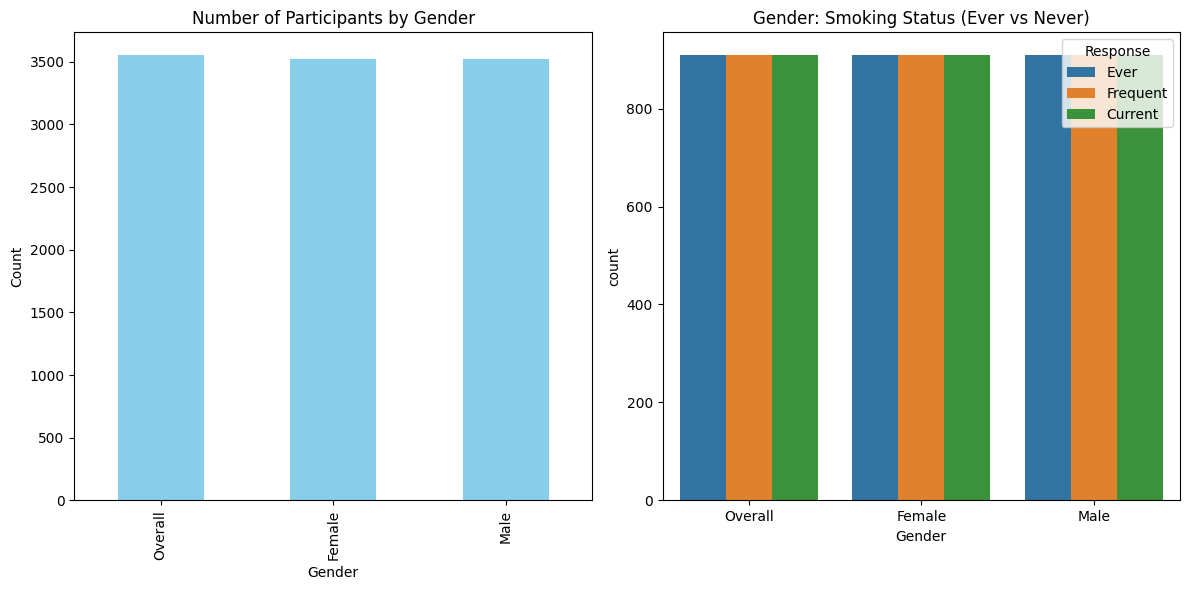

In [7]:
# Distribusi gender partisipan dan status merokok mereka.
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the number of survey participants by gender
df['Gender'].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number of Participants by Gender")
ax[0].set_ylabel("Count")

# Plot the count of responses by gender (e.g., Ever vs Never Tried Smoking)
# The 'data' argument is now correctly specified
sns.countplot(x="Gender", hue="Response", data=df, ax=ax[1])
ax[1].set_title("Gender: Smoking Status (Ever vs Never)")

# Show plot
plt.tight_layout()
plt.show()

# Keterangan Grafik:
- Plot kiri menampilkan jumlah partisipan survei berdasarkan gender
- Plot Kanan menunjukkan status merokok partisipan, dipisahkan berdasarkan gender.
Gender: Smoking Status (Ever vs Never)".

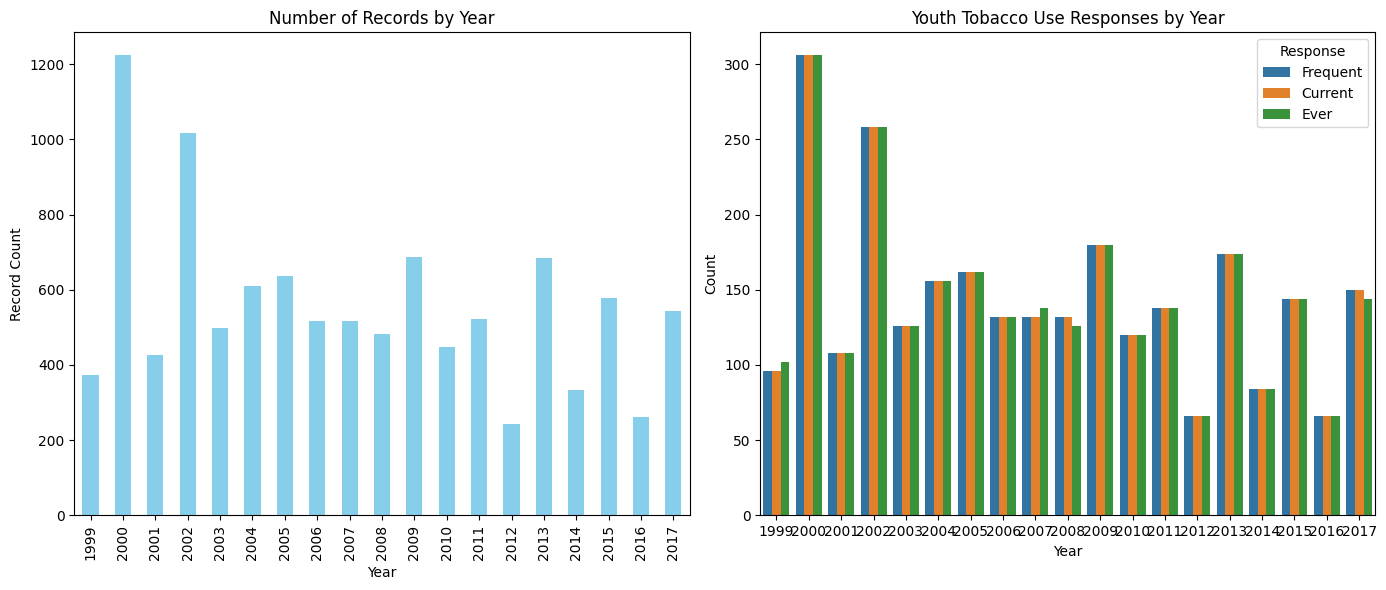

In [8]:
# menunjukkan jumlah tanggapan tertentu per tahun, dan kemudian membuat visualisasi perbandingan jumlah respons berdasarkan kolom Response
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Bar plot for the number of records by YEAR
df["YEAR"].value_counts().sort_index().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number of Records by Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Record Count")

# Plot 2: Countplot for YEAR with hue based on 'Response' type
# The 'data' argument is now correctly specified, and the redundant 'df=df' is removed
sns.countplot(x="YEAR", hue="Response", data=df, ax=ax[1])
ax[1].set_title("Youth Tobacco Use Responses by Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Count")

# Show the plots
plt.tight_layout()
plt.show()

# Ketarangan Grafik
- Grafik kiri menunjukkan jumlah total data per tahun. Ini membantu kita melihat distribusi data di setiap tahun survei.
- Grafik kanan menampilkan perbandingan jumlah tanggapan berdasarkan jenis respons (Ever, Frequent, Current) untuk setiap tahun. Ini menunjukkan bagaimana pola penggunaan tembakau berubah dari waktu ke waktu.

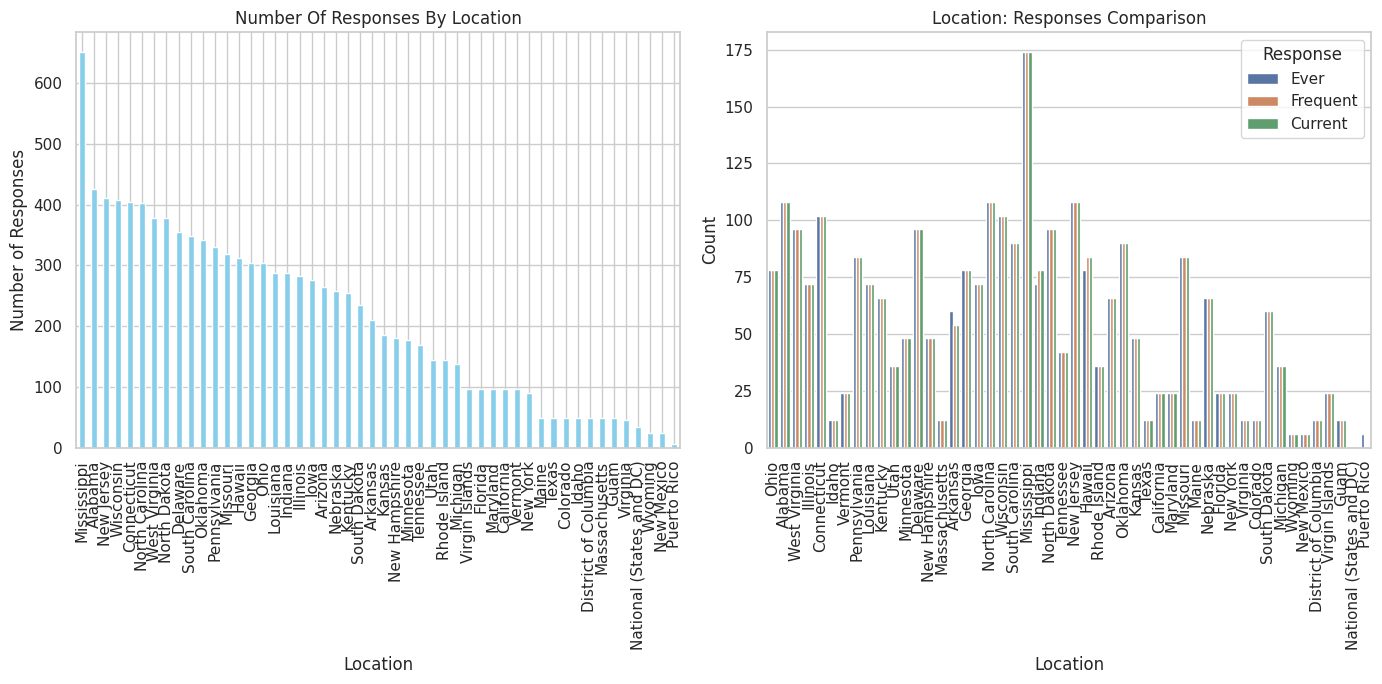

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot the number of responses by location
plt.figure(figsize=(14, 7))
ax1 = plt.subplot(1, 2, 1)
df['LocationDesc'].value_counts().plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Number Of Responses By Location')
ax1.set_xlabel('Location')
ax1.set_ylabel('Number of Responses')

# Plot the count of responses by location, colored by 'Response'
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=df, x='LocationDesc', hue='Response', ax=ax2)
ax2.set_title('Location: Responses Comparison')
ax2.set_xlabel('Location')
ax2.set_ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# Keterangan Grafik:
- Diagram batang pertama (kiri): Jumlah total respon survei per lokasi. Ini membantu kita melihat lokasi dengan jumlah respon survei tertinggi dan terendah.
- Diagram batang kedua (kanan): Distribusi jumlah responden berdasarkan lokasi, dibedakan berdasarkan jenis respon (Response). Ini memperlihatkan perbandingan jumlah responden di setiap lokasi yang memilih status seperti "Ever," "Frequent," atau "Current".

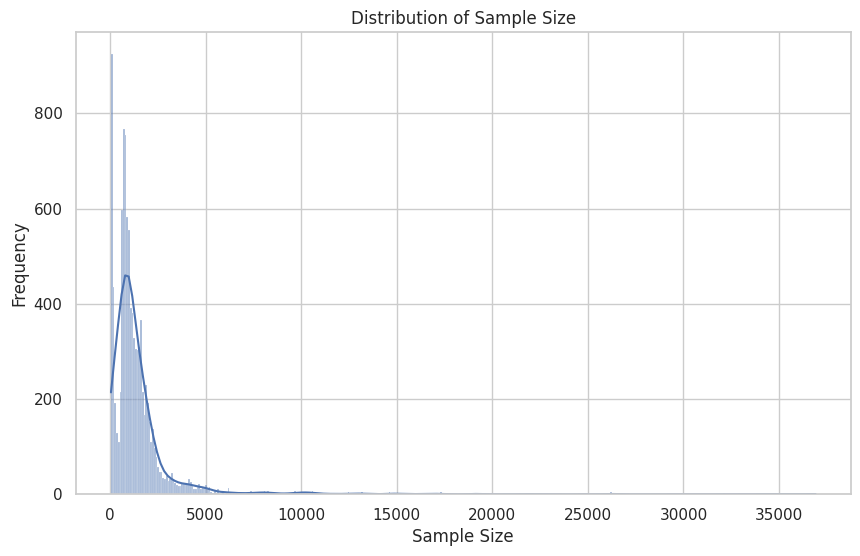

,Sample_Size
count,10080.000000
mean,1483.412897
std,2189.565233
min,50.000000
25%,671.000000
50%,1001.000000
75%,1642.000000
max,36910.000000


In [10]:
# Menunjukkan distribusi ukuran sampel dari data survei.
import seaborn as sns
import matplotlib.pyplot as plt

# Drop null values in 'Sample_Size' column and check the distribution
sample_size_data = df['Sample_Size'].dropna()

# Plotting the distribution of the 'Sample_Size' column
plt.figure(figsize=(10, 6))
sns.histplot(sample_size_data, kde=True)
plt.title("Distribution of Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Frequency")
plt.show()

# Calculating descriptive statistics to explain the distribution
sample_size_description = sample_size_data.describe()
sample_size_description


# Keterangan Grafik:
- Distribusi yang Miring ke Kanan:

Sebagian besar ukuran sampel berada di rentang yang lebih rendah, dengan frekuensi tertinggi di sekitar angka kurang dari 2,000.
Distribusi miring ke kanan (positively skewed), yang berarti ada beberapa ukuran sampel yang sangat besar (outliers), namun jarang terjadi.
- Puncak di Nilai Rendah:

Terdapat lonjakan frekuensi yang signifikan pada ukuran sampel rendah, sekitar 500–1,500. Ini menunjukkan bahwa sebagian besar survei dilakukan dengan ukuran sampel yang relatif kecil.

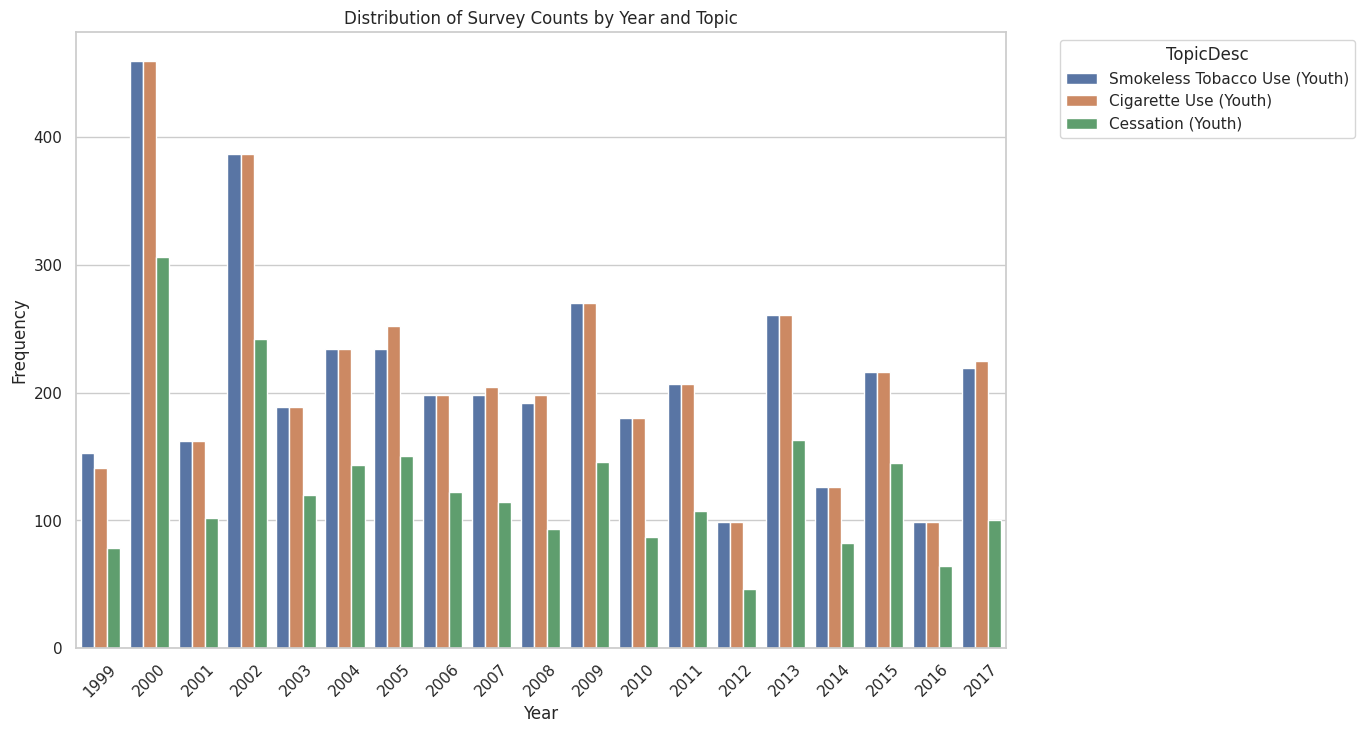

In [11]:
# Menunjukkan distribusi jumlah survei terkait penggunaan tembakau dari berbagai topik survei (TopicDesc) di setiap tahun (YEAR)
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up plot style
plt.figure(figsize=(12, 8))

# Plotting a countplot with 'YEAR' and 'TopicDesc' to make it multivariate
sns.countplot(data=df, x='YEAR', hue='TopicDesc')

# Adding plot title and labels
plt.title("Distribution of Survey Counts by Year and Topic")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x labels for readability if needed
plt.legend(title="TopicDesc", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot

plt.show()


# Keterangan Grafik:

Perbedaan Jumlah Survei Berdasarkan Tahun:

- Terdapat fluktuasi jumlah survei yang dilakukan tiap tahun. Beberapa tahun menunjukkan jumlah survei lebih tinggi, sementara tahun lain lebih sedikit.

Variasi Topik Survei:

- Setiap warna pada grafik mewakili topik survei yang berbeda, seperti "Cigarette Use (Youth)" atau "Smokeless Tobacco Use (Youth)".
- Beberapa topik survei mungkin lebih dominan atau lebih sering diadakan pada tahun-tahun tertentu, yang menunjukkan fokus atau perhatian pada topik tersebut selama periode tersebut.

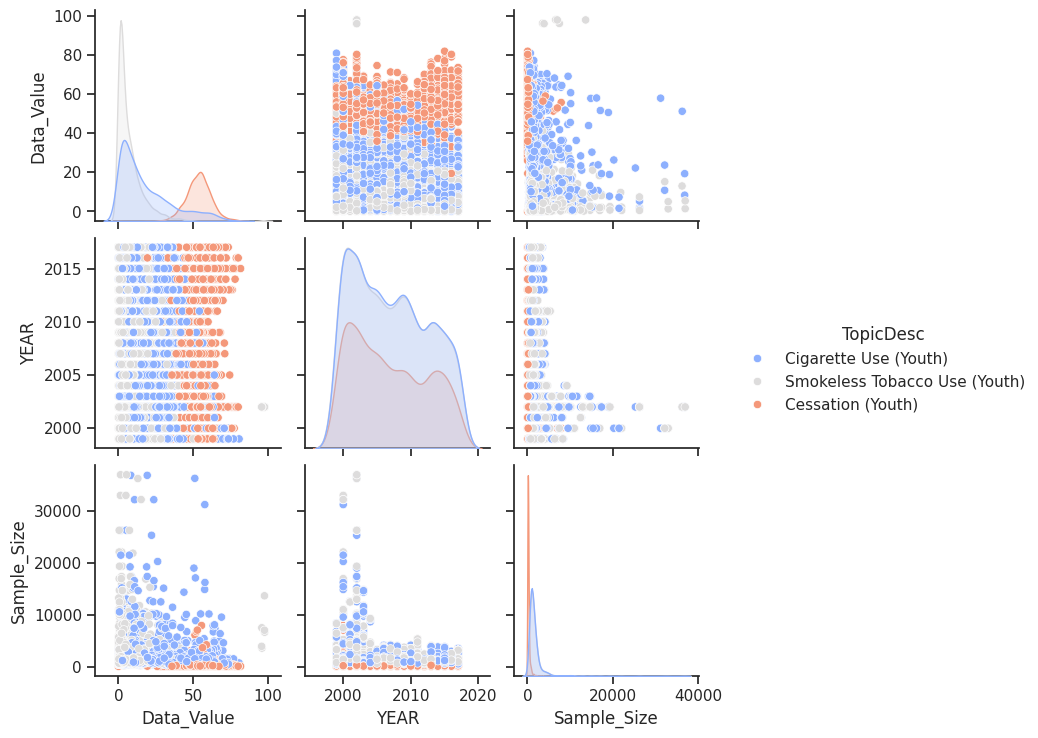

In [12]:
# menunjukkan visualisasi hubungan antara variabel numerik dalam data yang berhubungan dengan kebiasaan penggunaan tembakau di kalangan remaja.
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for multivariate analysis
# Using "YEAR", "Data_Value", and "Sample_Size" as numeric variables
# Using "TopicDesc" as the categorical variable for hue (to replace "Survived" in the example)
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, vars=["Data_Value", "YEAR", "Sample_Size"], hue="TopicDesc", palette="coolwarm")
plt.show()

# Keterangan Grafik:
Grafik pairplot menunjukkan scatter plot untuk setiap pasangan variabel (Data_Value, YEAR, Sample_Size), serta histogram di sepanjang diagonal untuk distribusi setiap variabel.
Berdasarkan hue pada TopicDesc, setiap titik berwarna sesuai kategori:
- Biru: Cigarette Use (Youth)
- Abu-abu: Smokeless Tobacco Use (Youth)
- Merah: Cessation (Youth)

Grafik ini memberikan gambaran apakah ada korelasi antara variabel-variabel numerik tersebut, serta perbedaan distribusi untuk setiap kategori topik

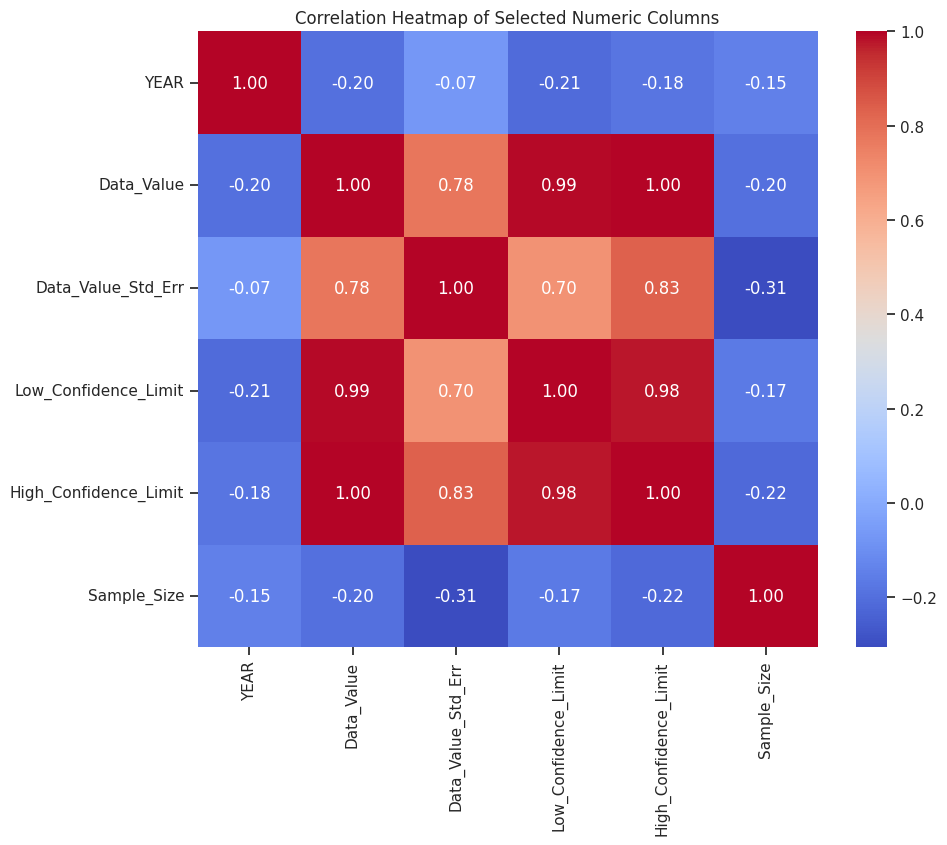

In [13]:
# Menghitung dan memvisualisasikan matriks korelasi antara kolom-kolom numerik dalam data. Matriks korelasi membantu memahami hubungan linier antara variabel-variabel numerik dalam dataset.
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns for correlation analysis
numeric_data = df[['YEAR', 'Data_Value', 'Data_Value_Std_Err',
                     'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size']]

# Calculating correlation
correlation_matrix = numeric_data.corr(method='pearson')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Numeric Columns')
plt.show()

# Keterangan Grafik:

Heatmap Korelasi menunjukkan kekuatan dan arah hubungan antara setiap pasangan variabel numerik:
- Warna merah menunjukkan korelasi positif, sedangkan warna biru menunjukkan korelasi negatif.
- Korelasi yang kuat (nilai mendekati 1 atau -1) terlihat antara beberapa kolom, seperti:
- Data_Value memiliki korelasi hampir sempurna dengan Low_Confidence_Limit dan High_Confidence_Limit (nilai mendekati 1), yang mungkin karena nilai batas kepercayaan ini terkait erat dengan nilai data.
- Data_Value_Std_Err juga menunjukkan korelasi positif dengan Data_Value dan High_Confidence_Limit, yang menunjukkan hubungan antara standar error dan nilai data.
- Kolom YEAR dan Sample_Size memiliki korelasi yang rendah dengan kolom lain, yang menunjukkan bahwa ukuran sampel dan tahun pengambilan data mungkin tidak terlalu berhubungan dengan variabel lainnya dalam dataset ini.

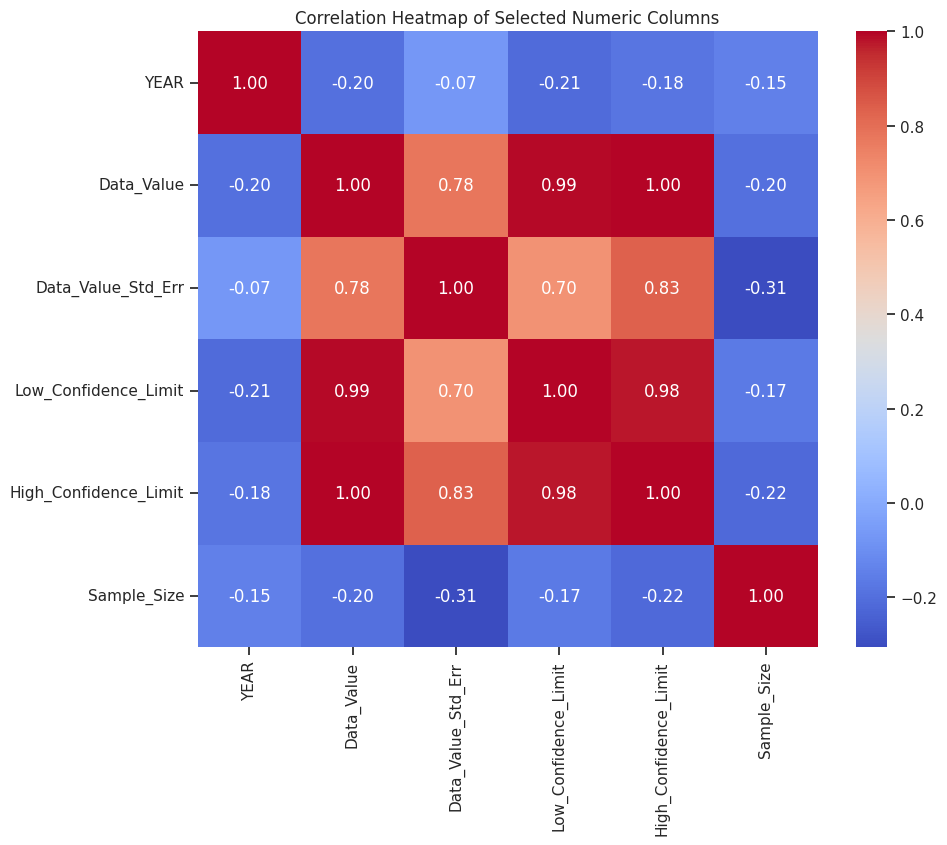

In [14]:
# Re-plotting the heatmap with the same column names as labels, similar to the provided example code
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Numeric Columns')
plt.show()

## Keterangan Grafik:

Heatmap ini menunjukkan koefisien korelasi. Nilai korelasi berkisar dari -1 hingga 1:
- 1 menunjukkan korelasi positif sempurna (variabel bergerak ke arah yang sama).
- -1 menunjukkan korelasi negatif sempurna (variabel bergerak ke arah yang berlawanan).
- 0 menunjukkan tidak ada korelasi.

Observasi Utama:
- Data_Value dan Low_Confidence_Limit: Memiliki korelasi positif yang sangat tinggi (0,99), yang menunjukkan bahwa ketika salah satu dari nilai ini meningkat, yang lain cenderung ikut meningkat.
- Data_Value dan High_Confidence_Limit: Korelasi positif tinggi lainnya (1,00), menunjukkan bahwa Data_Value sangat terkait dengan batas atas kepercayaannya.
- Sample_Size memiliki korelasi rendah dengan sebagian besar variabel lain, menunjukkan bahwa ukurannya tidak terlalu berkaitan erat dengan variabel-variabel lainnya.

Secara keseluruhan, heatmap ini membantu memvisualisasikan seberapa kuat setiap pasangan variabel dalam dataset berhubungan satu sama lain, dengan korelasi yang lebih kuat (positif atau negatif) ditandai oleh warna yang lebih gelap.